In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import draw_segmentation_masks
from torchvision.transforms import transforms
from torchvision.transforms import InterpolationMode

resize_t = transforms.Resize((426, 640), interpolation=InterpolationMode.NEAREST, antialias=True)
_2img = transforms.ToPILImage()

In [2]:
np.random.seed(0)

background = [0, 0, 0]

# Generate random RGB colors for the remaining 80 classes
colors = np.random.randint(0, 256, size=(80, 3), dtype=np.uint8).tolist()

# Combine background with the colors to create the palette
palette = [background] + colors

# Convert to numpy array for further processing
palette_np = np.array(palette, dtype=np.uint8)

alpha_channel = np.ones((81, 1), dtype=np.uint8) * 128
alpha_channel[0] = 0  # Setting the first class (background) to be transparent

palette_rgba_np = np.hstack((palette_np, alpha_channel))

print(palette_rgba_np)

[[  0   0   0   0]
 [172  10 127 128]
 [140  47 170 128]
 [196 151 117 128]
 [166  22 183 128]
 [192 204  33 128]
 [216  67 179 128]
 [ 78 154 251 128]
 [ 82 162 219 128]
 [195 118 125 128]
 [139 103 125 128]
 [229 216   9 128]
 [164 116 108 128]
 [211 222 161 128]
 [159  21  81 128]
 [ 89 165 242 128]
 [214 102  98 128]
 [ 36 183   5 128]
 [112  87  58 128]
 [ 43  76  70 128]
 [ 60  75 228 128]
 [216 189 132 128]
 [ 14  88 154 128]
 [178 246 140 128]
 [205 204  69 128]
 [ 58  57  41 128]
 [ 98 193  66 128]
 [ 72 122 230 128]
 [125 174 202 128]
 [ 39  74 234 128]
 [207  87 168 128]
 [101 135 174 128]
 [200 223 122 128]
 [ 88  94 107 128]
 [145  81 139 128]
 [141 100 165 128]
 [230 243 236 128]
 [ 25  66   9 128]
 [214  77 107 128]
 [ 47  18  72 128]
 [152  95  86 128]
 [  9  27  78 128]
 [ 22 148 151 128]
 [238 165 115 128]
 [  8  45   5 128]
 [208  19  69 128]
 [ 94 243 146 128]
 [ 38 213 197 128]
 [ 30   8 245 128]
 [254  71  53 128]
 [199  79   7 128]
 [238  35 175 128]
 [ 29 185 22

torch.Size([3, 426, 640])
(16, 256, 256)


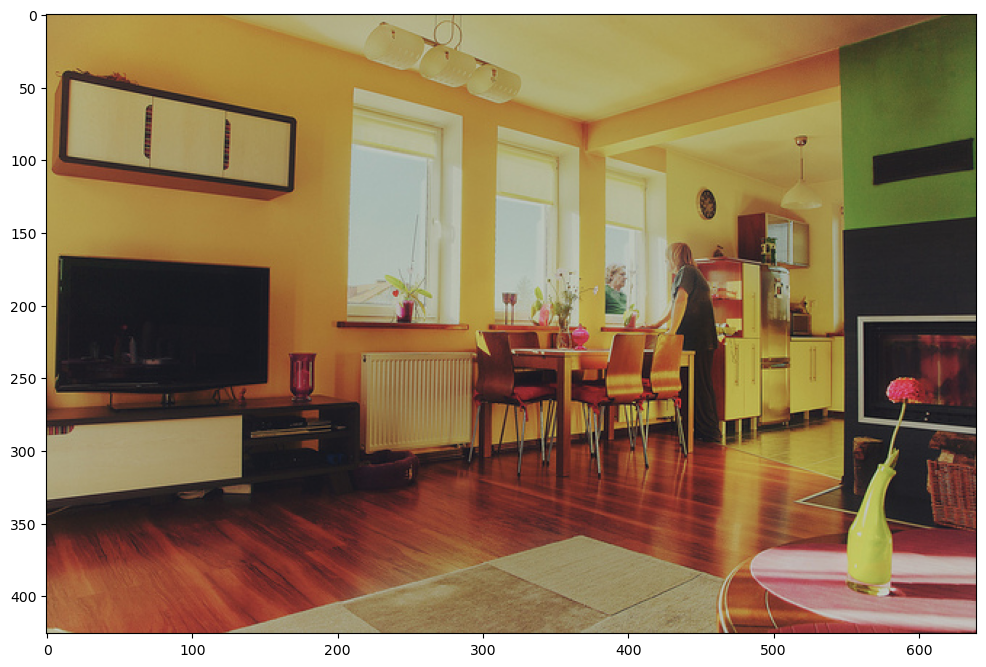

In [6]:
img = Image.open("val2017/000000000139.jpg")
img2tensor = transforms.PILToTensor()
img_t = img2tensor(img)
print(img_t.shape)

# img = Image.open("VOCtrainval_11-May-2012/VOCdevkit/VOC2012/SegmentationClass/2007_000032.png")
# img_arr = np.array(img)
# print(img_arr.shape)
# np.savetxt("segmentation.txt", img_arr, fmt="%i")
# label_arr2 = np.load("pseudo_labels/000000581204_mask.npy")
# print(label_arr2.dtype)
# rgb_label = palette_rgba_np[label_arr]
# np.savetxt("preds_txt.txt", label_arr, fmt="%i")
# print(rgb_label.shape)
# img2 = Image.fromarray(rgb_label, mode='RGBA')

# label_t = torch.from_numpy(label_arr.astype(bool)).unsqueeze(0)
# print(label_t.shape)
# label_t = resize_t(img2)
# drawn = draw_segmentation_masks(img_t, label_t, alpha=0.7)
# drawn = drawn.detach()
# drawn = _2img(drawn)
# np.savetxt("labels_val.txt", image_arr, fmt="%i")

image2_arr = np.load("preds.npy")
print(image2_arr.shape)
# image2_arr = (image2_arr / 80) * 255
# image2_arr = image2_arr.astype('uint8')
# image2 = Image.fromarray(image2_arr)
# image2_tr = resize_t(image2)
# print(image2_tr.size)
# image = np.loadtxt("labels.txt")
# print(image.squeeze(2).shape)


plt.figure(figsize=(12, 12))
plt.imshow(img)
# plt.imshow(label_t)
plt.show()

In [11]:
label_arr = np.load("labels.npy")
print(label_arr.dtype)
# np.savetxt("label_arr.txt", label_arr)

float32
